<a href="https://colab.research.google.com/github/ElisabethShah/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [0]:
#!pip install --upgrade seaborn

In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
def start():
    options = {
        'display': {
            'max_columns': None,
            'max_colwidth': 25,
            'expand_frame_repr': False,  # Don't wrap to multiple pages
            'max_rows': 50,
            'max_seq_items': 50,         # Max length of printed sequence
            'precision': 4,
            'show_dimensions': False,
            'float_format': lambda x: '%.3f' % x
        },
        'mode': {
            'chained_assignment': None   # Controls SettingWithCopyWarning
        }
    }

    for category, option in options.items():
        for op, value in option.items():
            pd.set_option(f'{category}.{op}', value)  # Python 3.6+

start()

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [10]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [11]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [12]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.420
1,abw,1801,34.420
2,abw,1802,34.420
3,abw,1803,34.420
4,abw,1804,34.420


In [13]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [14]:
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.000,NaN,coastline,12.500,-69.967,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of A...,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.000,NaN,landlocked,33.000,66.000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.000,NaN,coastline,-12.500,18.500,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.000,NaN,coastline,18.217,-63.050,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [15]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_perce...,NaN,measure,The estimated percent...,NaN,NaN,NaN,NaN,"Adults with HIV (%, a...","Adults with HIV (%, a...",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder...,hiv
1,age_at_1st_marriage_w...,NaN,measure,"The mean age, in year...",NaN,NaN,NaN,NaN,Age at 1st marriage (...,Age at 1st marriage (...,Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder...,population
2,aged_15_24_employment...,NaN,measure,Percentage of total p...,NaN,NaN,NaN,NaN,Aged 15-24 employment...,Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,employment_rate
3,aged_15_24_unemployme...,NaN,measure,Percentage of total p...,NaN,NaN,NaN,NaN,Aged 15-24 unemployme...,Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,unemployment
4,aged_15_64_labour_for...,NaN,measure,"For age group 15-64, ...",NaN,NaN,NaN,NaN,Aged 15-64 labour for...,Aged 15-64,Labour force particip...,"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,labour_force_particip...


In [0]:
csv_dict = {
    'income': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv',
    'lifespan': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv',
    'population': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv',
    'entities': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv',
    'concepts': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv'
}

dfs = {}

for k in csv_dict:
  dfs[k] = pd.read_csv(csv_dict[k])


In [17]:
dfs.keys()

dict_keys(['income', 'lifespan', 'population', 'entities', 'concepts'])

## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [18]:
dfs['income'].head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [19]:
dfs['lifespan'].head()

,geo,time,life_expectancy_years
0,abw,1800,34.420
1,abw,1801,34.420
2,abw,1802,34.420
3,abw,1803,34.420
4,abw,1804,34.420


In [20]:
dfs['population'].head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [21]:
dfs['entities'].head().T

,0,1,2,3,4
country,abkh,abw,afg,ago,aia
alt_5,NaN,NaN,NaN,NaN,NaN
alternative_1,NaN,NaN,Islamic Republic of A...,NaN,NaN
alternative_2,NaN,NaN,NaN,NaN,NaN
alternative_3,NaN,NaN,NaN,NaN,NaN
alternative_4_cdiac,NaN,Aruba,Afghanistan,Angola,NaN
arb1,NaN,NaN,NaN,NaN,NaN
arb2,NaN,NaN,NaN,NaN,NaN
arb3,NaN,NaN,NaN,NaN,NaN
arb4,NaN,NaN,NaN,NaN,NaN


In [22]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order.
        * right: use only keys from right frame, similar to a SQL right outer join;
          preserve key 

In [0]:
df = pd.merge(dfs['income'], dfs['lifespan'])
df = pd.merge(df, dfs['population'])

In [24]:
df_v2 = dfs['income'].merge(dfs['lifespan']).merge(dfs['population'])

df_v2.sample(10)

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
414,ago,1995,2967,51.960,14268994
19056,ken,1928,1482,25.700,2975718
29224,pol,1975,11599,70.800,33966572
15153,gtm,1967,3936,48.700,5160609
38741,ven,1856,802,32.200,1422935
17507,isl,1912,3162,56.040,111130
40037,zmb,1838,727,32.600,747000
23064,mdg,1994,1419,56.500,13066543
16255,hun,1974,14860,69.330,10486634
3388,bgr,1856,1304,38.260,2522618


In [25]:
df.equals(df_v2)

True

In [26]:
dfs['entities'][['country', 'name', 'world_6region']].sample(5)

,country,name,world_6region
54,cri,Costa Rica,america
218,som,Somalia,sub_saharan_africa
252,ukr,Ukraine,europe_central_asia
262,vnm,Vietnam,east_asia_pacific
64,dji,Djibouti,middle_east_north_africa


In [27]:
df = pd.merge(df, dfs['entities'][['country', 'name', 'world_6region']], left_on='geo', right_on='country')
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.210,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.200,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.190,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.180,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.170,3280000,afg,Afghanistan,south_asia


In [28]:
df = df.drop(columns=['geo', 'country'])
df.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,name,world_6region
0,1800,603,28.210,3280000,Afghanistan,south_asia
1,1801,603,28.200,3280000,Afghanistan,south_asia
2,1802,603,28.190,3280000,Afghanistan,south_asia
3,1803,603,28.180,3280000,Afghanistan,south_asia
4,1804,603,28.170,3280000,Afghanistan,south_asia


In [29]:
# col_name_map = {
#     'time': 'year', 
#     'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
#     'life_expectancy_years': 'lifespan', 
#     'population_total': 'population', 
#     'name': 'country', 
#     'world_6region': 'region'
# }

# df = df.rename(columns=col_name_map)
df.columns = ['year', 'income', 'lifespan', 'population', 'country', 'region']
df.head()

,year,income,lifespan,population,country,region
0,1800,603,28.210,3280000,Afghanistan,south_asia
1,1801,603,28.200,3280000,Afghanistan,south_asia
2,1802,603,28.190,3280000,Afghanistan,south_asia
3,1803,603,28.180,3280000,Afghanistan,south_asia
4,1804,603,28.170,3280000,Afghanistan,south_asia


In [30]:
df.shape

(40437, 6)

## Explore data

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40437 entries, 0 to 40436
Data columns (total 6 columns):
year          40437 non-null int64
income        40437 non-null int64
lifespan      40437 non-null float64
population    40437 non-null int64
country       40437 non-null object
region        40437 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 2.2+ MB


In [32]:
df.dtypes

year            int64
income          int64
lifespan      float64
population      int64
country        object
region         object
dtype: object

In [33]:
df.describe()

,year,income,lifespan,population
count,40437.000,40437.000,40437.000,40437.000
mean,1909.293,4619.493,43.132,13712042.573
std,63.309,10209.571,16.313,66063348.915
min,1800.000,247.000,1.000,2128.000
25%,1854.000,876.000,31.160,411331.000
50%,1909.000,1442.000,35.500,1985952.000
75%,1964.000,3488.000,55.970,6499707.000
max,2018.000,177522.000,84.170,1415045928.000


In [34]:
df[df['lifespan'] <= 10]

,year,income,lifespan,population,country,region
118,1918,849,7.890,5704092,Afghanistan,south_asia
7392,1918,1030,5.990,2402322,Cameroon,sub_saharan_africa
7611,1918,852,9.680,9815443,"Congo, Dem. Rep.",sub_saharan_africa
11790,1889,537,5.020,7724884,Ethiopia,sub_saharan_africa
11791,1890,537,4.010,7832385,Ethiopia,sub_saharan_africa
11792,1891,537,8.030,7941383,Ethiopia,sub_saharan_africa
11988,1868,1669,8.110,1817928,Finland,europe_central_asia
12214,1875,949,1.000,128811,Fiji,east_asia_pacific
12257,1918,1222,6.870,151755,Fiji,east_asia_pacific
12695,1918,613,8.550,26809,"Micronesia, Fed. Sts.",east_asia_pacific


In [35]:
df.describe(exclude=np.number)

,country,region
count,40437,40437
unique,187,6
top,Saudi Arabia,europe_central_asia
freq,219,10778


In [36]:
df['country'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece',

In [37]:
df['country'].nunique()

187

In [38]:
df[df['year'] >= 2000].describe()

,year,income,lifespan,population
count,3547.000,3547.000,3547.000,3547.000
mean,2008.986,15994.408,69.973,36647086.352
std,5.471,18919.603,8.865,136524548.570
min,2000.000,504.000,32.110,52055.000
25%,2004.000,2868.500,64.000,2113464.500
50%,2009.000,8977.000,72.030,8229629.000
75%,2014.000,21954.500,76.765,24907906.000
max,2018.000,129350.000,84.170,1415045928.000


In [39]:
usa = df[df['country'] == 'United States']
usa[usa['year'].isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
38046,1818,2258,39.410,9879049,United States,america
38146,1918,9371,47.180,106721812,United States,america
38246,2018,54898,79.140,326766748,United States,america


In [40]:
usa[usa['year'].isin([1850, 1950])]

,year,income,lifespan,population,country,region
38078,1850,3058,39.410,24136293,United States,america
38178,1950,15317,68.070,158804395,United States,america


In [41]:
china = df[df['country'] == 'China']
china[china['year'].isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
6854,1818,985,32.000,374161494,China,east_asia_pacific
6954,1918,989,22.130,462444535,China,east_asia_pacific
7054,2018,16018,76.920,1415045928,China,east_asia_pacific


## Plot visualization

In [42]:
now = df[df['year'] == 2018]
now.shape

(184, 6)

In [43]:
now.sample(10)

,year,income,lifespan,population,country,region
21555,2018,12382,77.820,20950041,Sri Lanka,south_asia
4864,2018,6975,73.970,11215674,Bolivia,america
5521,2018,76943,77.360,434076,Brunei,east_asia_pacific
14766,2018,25498,81.340,11142161,Greece,europe_central_asia
32552,2018,8293,75.750,6411558,El Salvador,america
35837,2018,2922,72.190,9107211,Tajikistan,europe_central_asia
8806,2018,16240,81.420,4953199,Costa Rica,america
3331,2018,3722,73.410,166368149,Bangladesh,south_asia
26858,2018,5470,78.720,6284757,Nicaragua,america
18927,2018,24171,71.960,18403860,Kazakhstan,europe_central_asia


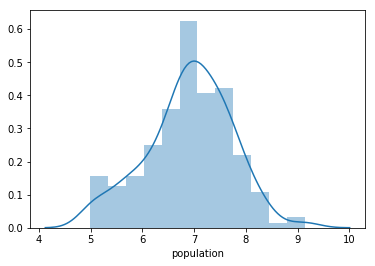

In [44]:
sns.distplot(np.log10(now['population']));

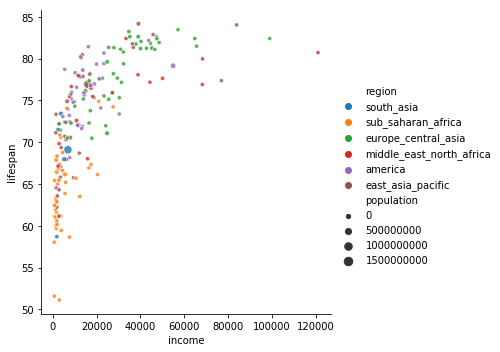

In [45]:
sns.relplot(x='income', y='lifespan', hue='region', 
            size='population', alpha=0.8, data=now);

## Analyze outliers

In [46]:
now[now['income'] > 80000].sort_values('income')

,year,income,lifespan,population,country,region
31895,2018,83888,84.030,5791901,Singapore,east_asia_pacific
22212,2018,99034,82.390,590321,Luxembourg,europe_central_asia
30362,2018,121033,80.710,2694849,Qatar,middle_east_north_africa


In [47]:
now[now['income'] < 1000].sort_values('income')

,year,income,lifespan,population,country,region
32771,2018,629,58.030,15181925,Somalia,sub_saharan_africa
6178,2018,689,51.580,4737423,Central African Republic,sub_saharan_africa
2455,2018,691,61.140,11216450,Burundi,sub_saharan_africa
7711,2018,751,62.420,84004989,"Congo, Dem. Rep.",sub_saharan_africa
20898,2018,801,65.430,4853516,Liberia,sub_saharan_africa
26420,2018,949,62.450,22311375,Niger,sub_saharan_africa


In [48]:
now[now['lifespan'] < 60].sort_values('lifespan')

,year,income,lifespan,population,country,region
21774,2018,2960,51.120,2263010,Lesotho,sub_saharan_africa
6178,2018,689,51.580,4737423,Central African Republic,sub_saharan_africa
32771,2018,629,58.030,15181925,Somalia,sub_saharan_africa
34523,2018,7604,58.640,1391385,Swaziland,sub_saharan_africa
218,2018,1867,58.690,36373176,Afghanistan,south_asia
40217,2018,3865,59.450,17609178,Zambia,sub_saharan_africa
14328,2018,1547,59.660,1907268,Guinea-Bissau,sub_saharan_africa


In [0]:
def plot_annotate_country(country_name, text_ann):
  country = now[now['country'] == country_name]
  country_income = country['income'].values[0]
  country_lifespan = country['lifespan'].values[0]
  sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now)
  plt.text(x=country_income-5000, y=country_lifespan+1, s=country_name)
  plt.title(f'{country_name} {text_ann}')

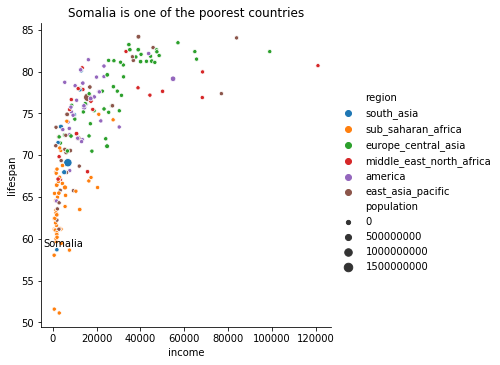

In [50]:
country_name = 'Somalia'
text_ann = 'is one of the poorest countries'
plot_annotate_country(country_name, text_ann)

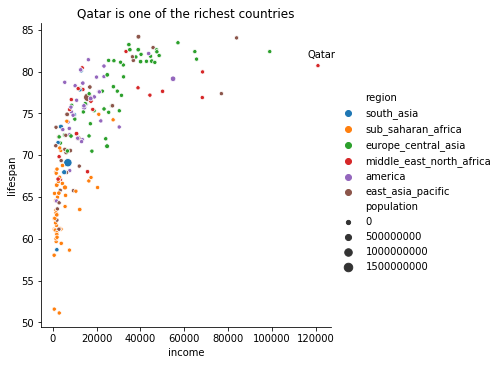

In [51]:
plot_annotate_country('Qatar', 'is one of the richest countries')

## Plot multiple years

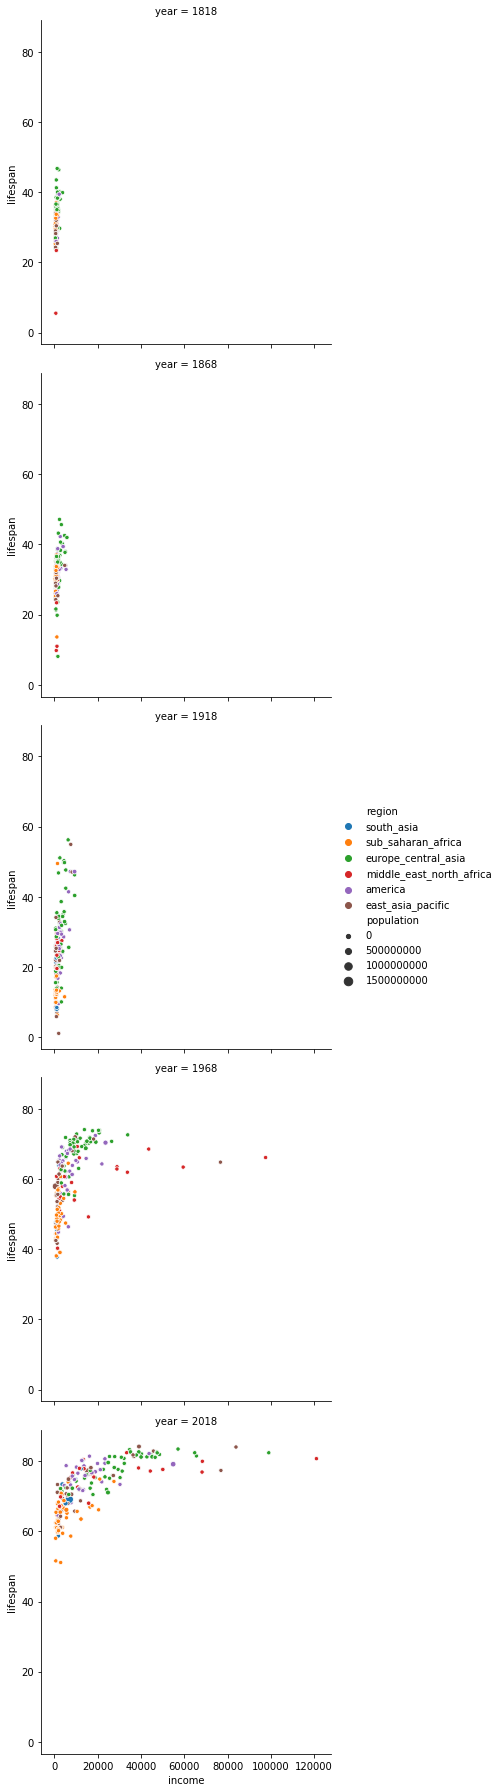

In [52]:
sns.relplot(x='income', 
            y='lifespan', 
            hue='region', 
            size='population', 
            data=df[df['year'].isin(range(1818, 2019, 50))],
            row='year');

## Point out a story

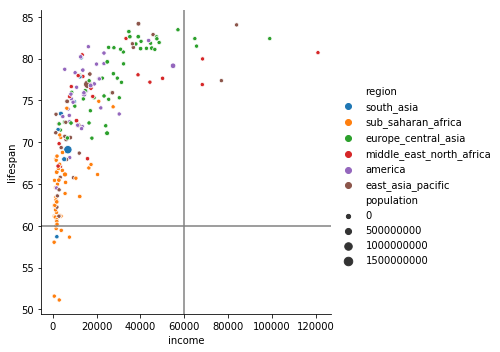

In [53]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now)
plt.axhline(y=60, color='grey')
plt.axvline(x=60000, color='grey');

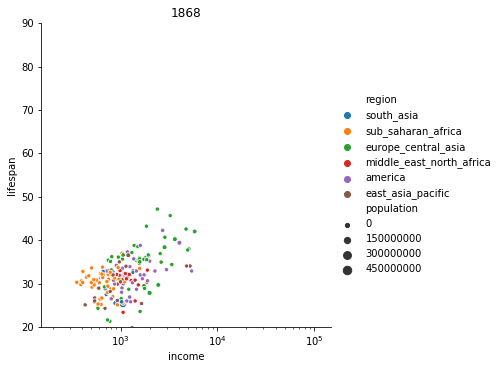

In [54]:
year = 1868 #@param {type:"slider", min:1800, max:2018, step:1}

sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            data=df[df.year==year])

plt.xscale('log')
plt.xlim((150, 150000))
plt.ylim((20, 90))
plt.title(year);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

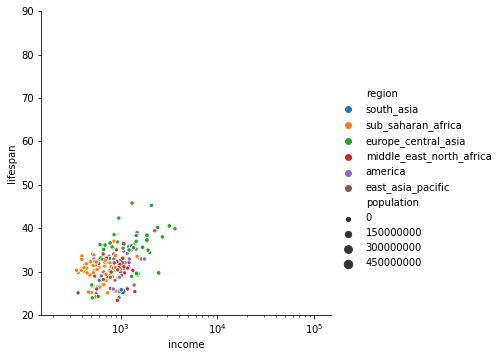

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

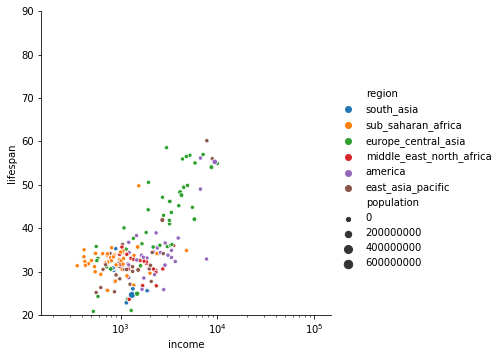

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

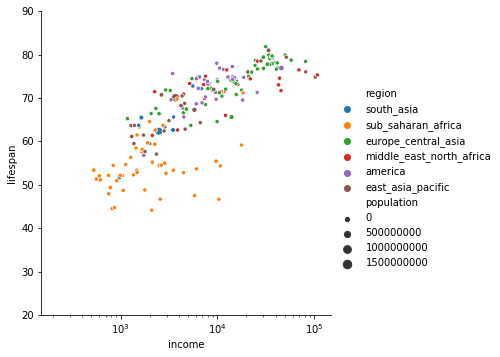

<IPython.core.display.Javascript object>

In [55]:
from google.colab import widgets

years = [1819, 1919, 2000]
tb = widgets.TabBar([str(year) for year in years])
for tab, year in zip(tb, years):
    sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                data=df[df.year==year])

    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90));

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project

In [0]:
import ipywidgets as widgets
# back end of ipywidgets
from IPython.display import display

In [58]:
widgets.interact(graph_for_year, year = (1800, 2018, 1));

interactive(children=(IntSlider(value=1909, description='year', max=2018, min=1800), Output()), _dom_classes=(…

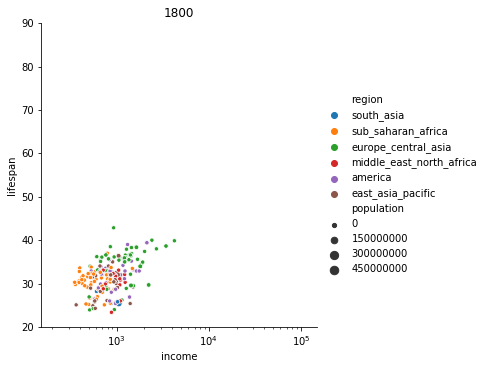

In [57]:
def graph_for_year(year):
    sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            data=df[df.year==year])
    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90))
    plt.title(year)
    plt.show()
    return
  
graph_for_year(1800)

In [0]:
from matplotlib import animation, rc
from IPython.display import HTML

In [62]:
# animate over some set of x, y
x = np.linspace(-4, 4, 100)
y = np.sin(x)

# First set up the figure, the axes, and the plot element
fig, ax = plt.subplots()
plt.close()
ax.set_xlim(( -4, 4))
ax.set_ylim((-2, 2))
line1, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line1.set_data(x, y)      
    return (line1,)
  
# animation function: this is called sequentially
def animate(i):
  at_x = x[i]
  
  # gradient_line will have the form m*x + b
  m = np.cos(at_x)
  b = np.sin(at_x) - np.cos(at_x)*at_x
  gradient_line = m*x + b
  
  line2.set_data(x, gradient_line)
  return (line2,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=100, blit=True)

rc('animation', html='jshtml')
anim